In [32]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

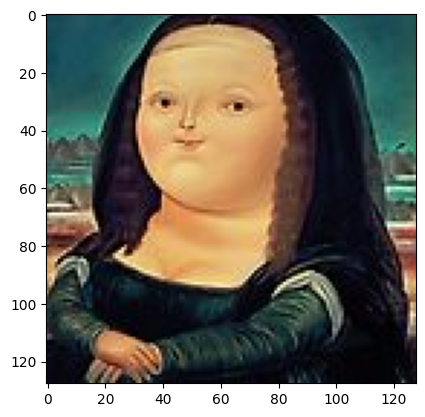

In [33]:
img = cv2.cvtColor(cv2.imread("../data/MonaLisaBotero.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [34]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.2], out, img) #X,Y,r,R,G,B,alpha

3863900

In [35]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [36]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

# Our Differential Evolution

In [37]:
from differential_evolution import differential_evolution

0 {'P': array([ 51.32539786,  50.70839969,  43.56080471, 535.1505067 ,
       170.35694404,  25.93366326,   0.7805731 ]), 'nIt': 800, 'fun': 3058107, 'nFev': 60075}


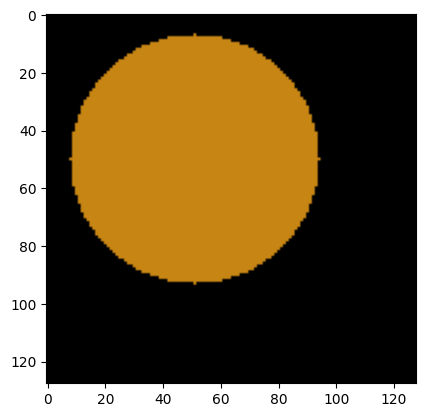

160 {'P': array([ 3.76517608e+01,  8.95567251e+01,  2.94439250e+00, -9.01010820e+02,
        2.02047818e+02,  1.75600256e+02,  3.02099068e-01]), 'nIt': 800, 'fun': 1413289, 'nFev': 60075}


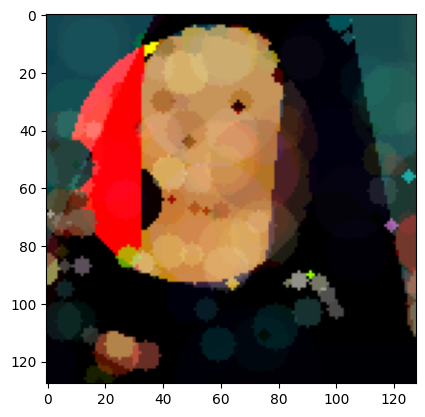

320 {'P': array([ 4.84539350e+01,  5.35448588e+00,  6.03824707e-01,  7.81849664e+02,
        6.46462273e+02,  1.40368168e+03, -2.85472776e-01]), 'nIt': 800, 'fun': 1268589, 'nFev': 60075}


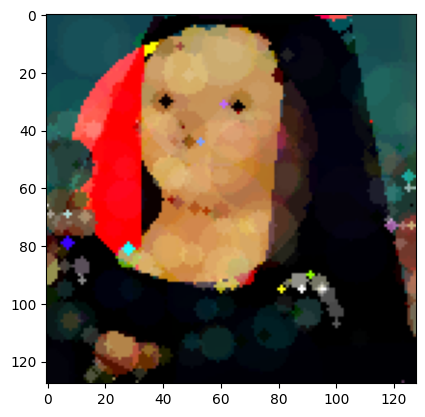

480 {'P': array([   5.69166624,   30.66160633,    8.49377794,   34.32817727,
       -123.67237912, -243.71405476,    0.28816478]), 'nIt': 800, 'fun': 1185882, 'nFev': 60075}


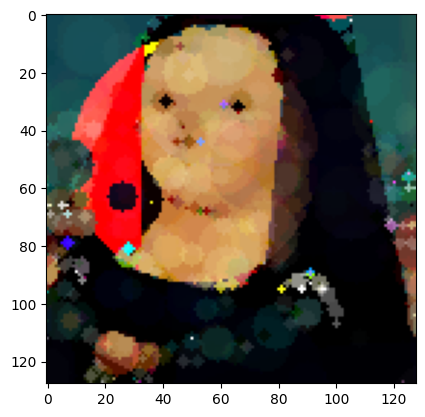

640 {'P': array([ 8.14866482e+01,  2.55268877e+01,  1.36086423e+00,  2.20418738e+02,
        4.44882068e+03,  1.67096956e+02, -1.11258908e+00]), 'nIt': 800, 'fun': 1110863, 'nFev': 60075}


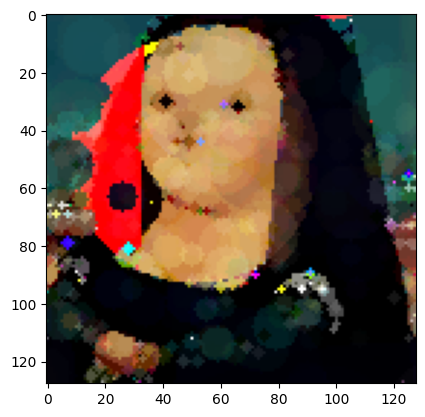

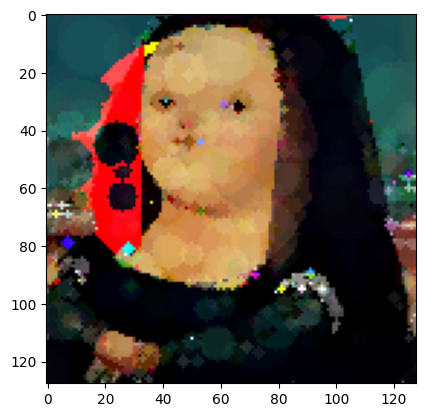

In [38]:
nIter, out = 800, np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=75, cR = 0.3, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))):
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [39]:
from scipy.optimize import differential_evolution

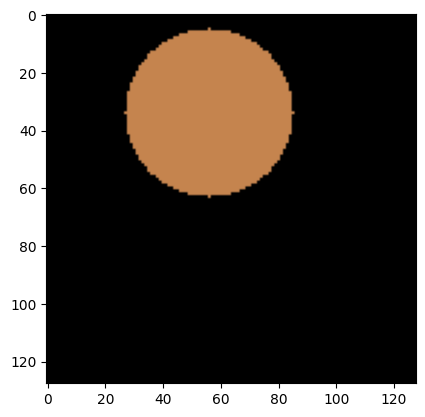

0      fun: 3030248.0
 message: 'Optimization terminated successfully.'
    nfev: 16808
     nit: 23
 success: True
       x: array([ 56.6213094 ,  34.5831282 ,  29.85454827, 247.24298448,
       165.79814101,  97.92910356,   0.79587144])


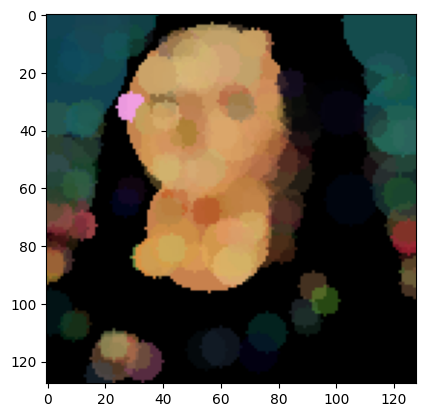

160      fun: 1648135.0
 message: 'Optimization terminated successfully.'
    nfev: 7708
     nit: 10
 success: True
       x: array([  1.74013185,  86.61089539,   5.56389855, 238.84579036,
       132.27093636,  49.16410812,   0.32213069])


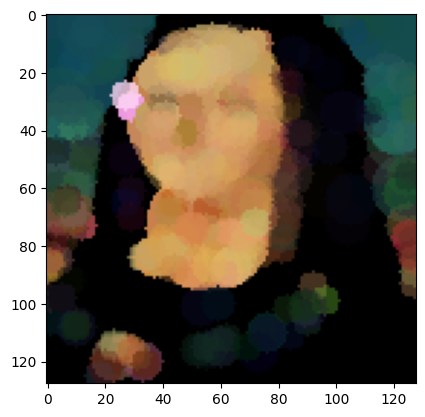

320      fun: 1547302.0
 message: 'Optimization terminated successfully.'
    nfev: 7708
     nit: 10
 success: True
       x: array([ 52.6134625 , 116.4453456 ,   6.28018586,  15.67699958,
        52.85291962,  32.6457636 ,   0.34641249])


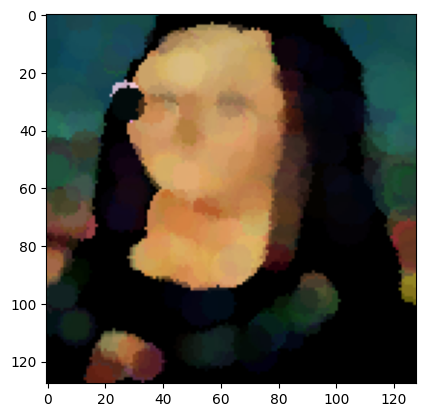

480      fun: 1510585.0
 message: 'Optimization terminated successfully.'
    nfev: 7708
     nit: 10
 success: True
       x: array([ 2.9619139 , 54.05941869,  6.71746014, 26.06519157, 93.19319584,
       60.06444364,  0.62082036])


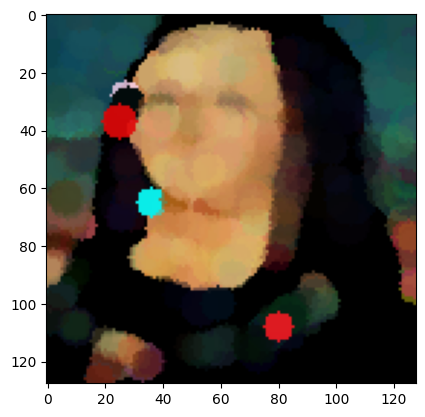

640      fun: 1484756.0
 message: 'Optimization terminated successfully.'
    nfev: 9108
     nit: 12
 success: True
       x: array([ 64.42286513,  19.64081813,   5.12056839, 173.8168682 ,
       177.84632939, 123.71817353,   0.42193213])


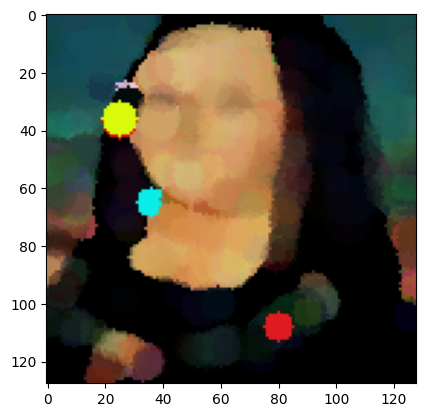

In [40]:
nIter, out = 800, np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // 5): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.